In [1]:
import json
import pandas as pd

In [2]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

tmdb_movies_df = load_tmdb_movies('Downloads/input/tmdb_5000_movies.csv')

In [3]:
genres_list = set()

for genres in tmdb_movies_df.genres:
    for genre in genres:
        genres_list.add(genre['name'])

genres_list = list(genres_list)

Matrix = [[0]*len(genres_list) for i in range(len(genres_list))]

In [4]:
for genres in tmdb_movies_df.genres:
    related_genres = list()
    
    for genre in genres:
        related_genres.append(genres_list.index(genre['name']))
    
    index = 0
    for genre1 in related_genres:
        for genre2 in related_genres[index + 1:]:
            Matrix[genre1][genre2] += 1
            Matrix[genre2][genre1] += 1
        index += 1

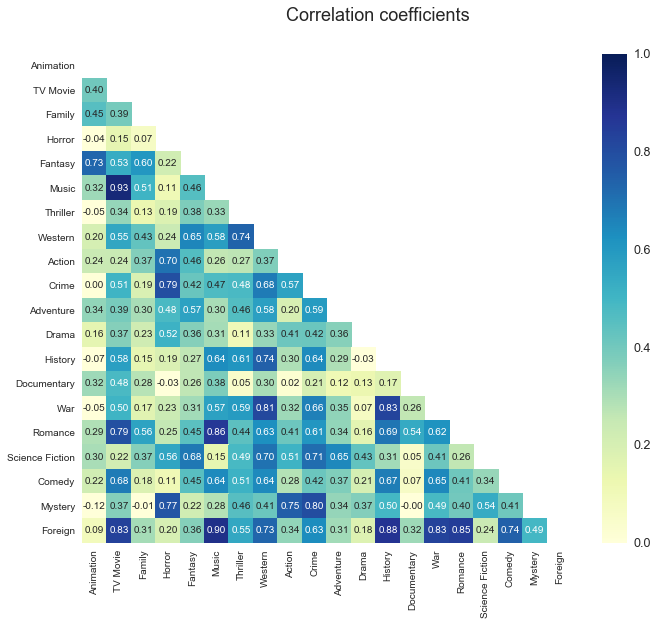

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = pd.DataFrame(data=Matrix, columns=genres_list)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.set(font_scale=1.25)
hm = sns.heatmap(corr, vmin=0, vmax=1, cmap="YlGnBu", mask=mask, cbar=True, annot=True, square=True,
                 fmt='.2f', center=.5, annot_kws={'size': 10})

f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18)

plt.show()